# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business objectives for this project are to evaluate the provided used car dataset, analyze to gain insights, and then identify the features that have the highest correlation with the price of the car.  We are being asked to perform this exercise so that the business can identify impactful characteristics to maximize revenue and apply costs where most likely to deliver profit. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

I will perform four tasks in understanding thge data.  These are:

1) Load the data and gather information on total non-null values in each column and data types
2) Display the first 10 rows of the dataset
3) Set save location for images
4) Generate a count of each value in each column and a list of unique values in each column

#### Methodology Attribution
In addition to the course materials, I used the following resources for examples and other methods for this effort
* https://github.com/avidunixuser/UsedCarFeatureImportance/blob/main/1.%20data-preprocessing.ipynb
* Geron, AurelionHands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. E-book ed., O'Reilly Media, inc., 2023

In [139]:
# Load relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

from yellowbrick.regressor import AlphaSelection

from pathlib import Path

In [12]:
# set save location for images
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [13]:
# Load the data
vehicles = pd.read_csv('data/vehicles.csv')

# gather information on total non-null values in each column and data types
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [17]:
# display the first 10 rows of the dataset
vehicles.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


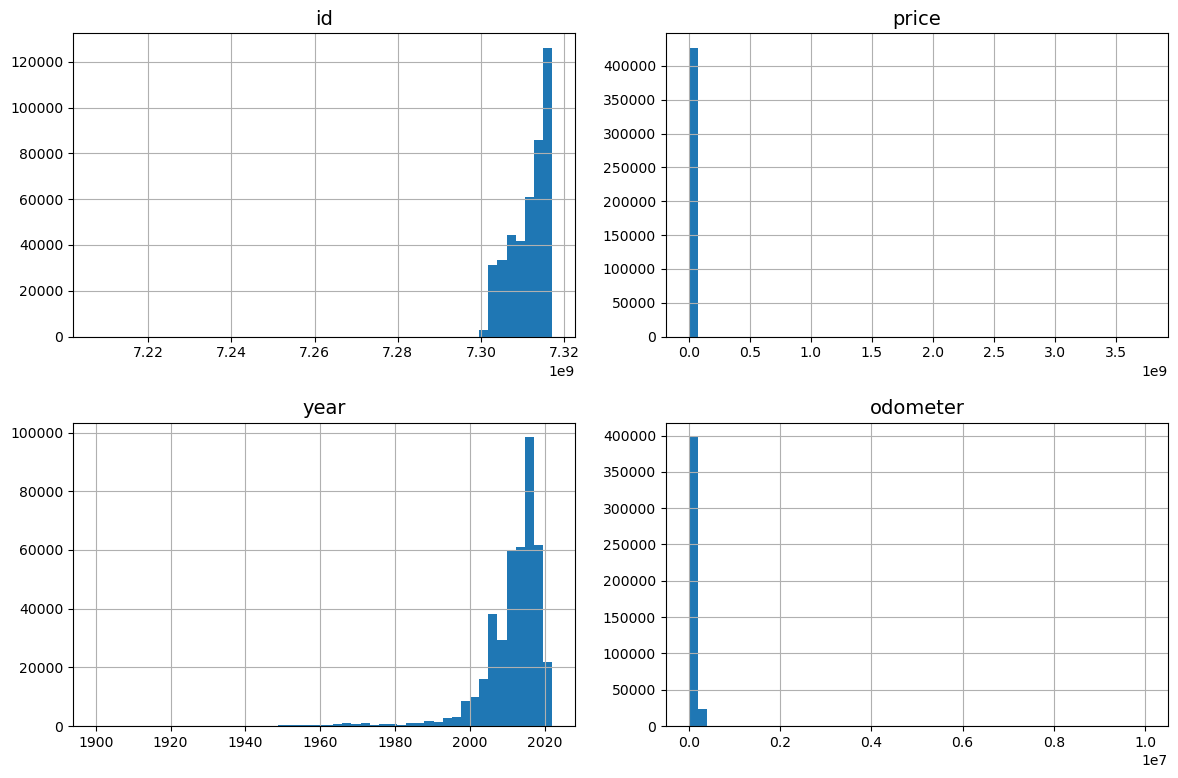

In [19]:
# define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# histogram plots for numerical objects
vehicles.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")
plt.show()

In [23]:
# Generate a count of each value in each column ans a list of unique values in each column
for col in vehicles.columns:
    print(vehicles[col].nunique())
    print(vehicles[col].unique())

426880
[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]
404
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' '

We can now generate a brief description of each column in the dataset, whether the column is descriptive, numerical or categorical and, if categorical, the list of unique values in that column.
* `id`: The id of the vehicle
    * numerical
* `region`: The region of the vehicle
    * categorical - list of 404 unique regions
    * List too lengthy for this cell but is displayed in the previous cell
* `price`: The price of the vehicle
    * numerical
    * (this is the target variable)
* `year`: The year of the vehicle
    * numerical
* `manufacturer`: The manufacturer of the vehicle
    * categorical - list of 42 unique manufacturers
    * 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan
* `model`: The model of the vehicle
    * descriptive - at nearly 30k results this is too lengthy to be considered categorical
* `condition`: The condition of the vehicle
    * categorical - list of 6 unique conditions
    * 'good' 'excellent' 'fair' 'like new' 'new' 'salvage'
* `cylinders`: The number of cylinders in the vehicle
    * categorical - list of 8 unique cylinders
    * '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other' '3 cylinders' '10 cylinders' '12 cylinders'
* `fuel`: The fuel type of the vehicle
    * categorical - list of 5 unique fuel types
    * 'gas' 'other' 'diesel' 'hybrid' 'electric'
* `odometer`: The odometer reading of the vehicle
    * numerical
* `title_status`: The title status of the vehicle
    * categorical - list of 5 unique title statuses
    * 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only'
* `transmission`: The transmission type of the vehicle
    * categorical - list of 3 unique transmission types
    * 'other' 'automatic' 'manual'
* 'VIN`: The VIN of the vehicle
    * descriptive
* `drive`: The drive type of the vehicle
    * categorical - list of 3 unique drive types
    * '4wd' 'fwd' 'rwd'
* `size`: The size of the vehicle
    * categorical - list of 3 unique sizes
    * 'full-size' 'mid-size' 'compact'
* `type`: The type of the vehicle
    * categorical - list of 9 unique types
    * 'truck' 'pickup' 'sedan' 'hatchback' 'van' 'convertible' 'other' 'coupe' 'wagon'
* `paint_color`: The paint color of the vehicle
    * categorical - list of 11 unique paint colors
    * 'white' 'red' 'black' 'silver' 'grey' 'blue' 'orange' 'brown' 'green' 'custom' 'yellow'
* 'state`: The state of the vehicle
    * categorical - list of 51 unique states
    * Potentially irrelevant since this is info is already baked into region column





In [26]:
# Show count of rows by 'year'
year_counts = vehicles['year'].value_counts()
year_counts

year
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1909.0        1
Name: count, Length: 114, dtype: int64

In [30]:
#Run .describe() on each of the numerical fields
print(vehicles[['price', 'year', 'odometer']].describe())

              price           year      odometer
count  4.268800e+05  425675.000000  4.224800e+05
mean   7.519903e+04    2011.235191  9.804333e+04
std    1.218228e+07       9.452120  2.138815e+05
min    0.000000e+00    1900.000000  0.000000e+00
25%    5.900000e+03    2008.000000  3.770400e+04
50%    1.395000e+04    2013.000000  8.554800e+04
75%    2.648575e+04    2017.000000  1.335425e+05
max    3.736929e+09    2022.000000  1.000000e+07


* There are outliers in the above analysis that will need to addressed in the data preparation phase.  
* Nearly all columns contained at least some NaN values (excluding id, region, price, and state).  We will need to account for these in our analysis.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [32]:
# create function to shuffle data randomly and then split into train and test sets
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [34]:
# Create train and test sets
train_set, test_set = shuffle_and_split_data(vehicles, 0.2)
len(train_set)

341504

In [36]:
len(test_set)

85376

In [38]:
# Remove all columns which have no bearing on the outcome for each of the two sets
# includes state since the region contains the same info but is more granular
train_set=train_set.drop(columns=['VIN','state','model'])
test_set=test_set.drop(columns=['VIN','state','model'])
train_set.head()

,id,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
148242,7313816341,"st louis, MO",17850,2012.0,jeep,excellent,6 cylinders,gas,75500.0,rebuilt,automatic,4wd,mid-size,NaN,black
122576,7315709265,atlanta,9800,2011.0,honda,excellent,6 cylinders,gas,218600.0,clean,automatic,fwd,mid-size,mini-van,red
105850,7314115423,orlando,52500,2020.0,gmc,NaN,NaN,gas,17860.0,clean,automatic,NaN,NaN,NaN,NaN
43029,7314368139,orange county,34575,2019.0,mercedes-benz,NaN,4 cylinders,gas,15360.0,clean,automatic,rwd,compact,SUV,white
285879,7316256021,bismarck,23990,2016.0,ford,excellent,8 cylinders,gas,161560.0,clean,automatic,4wd,full-size,pickup,grey


In [40]:
# Reindex so id is the index
train_set=train_set.set_index('id')
test_set=test_set.set_index('id')
train_set.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
id,,,,,,,,,,,,,,
7313816341,"st louis, MO",17850,2012.0,jeep,excellent,6 cylinders,gas,75500.0,rebuilt,automatic,4wd,mid-size,NaN,black
7315709265,atlanta,9800,2011.0,honda,excellent,6 cylinders,gas,218600.0,clean,automatic,fwd,mid-size,mini-van,red
7314115423,orlando,52500,2020.0,gmc,NaN,NaN,gas,17860.0,clean,automatic,NaN,NaN,NaN,NaN
7314368139,orange county,34575,2019.0,mercedes-benz,NaN,4 cylinders,gas,15360.0,clean,automatic,rwd,compact,SUV,white
7316256021,bismarck,23990,2016.0,ford,excellent,8 cylinders,gas,161560.0,clean,automatic,4wd,full-size,pickup,grey


In [42]:
#Build lists of columns that are numerical (excluding the target column, 'price'), descriptive, and categorical
num_cols=['year','odometer']
cat_cols=['region','manufacturer','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

#### Missing values

In [44]:
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]

In [46]:
# impute missing numerical data
imputer_num=IterativeImputer(estimators[3])
impute_data=imputer_num.fit_transform(train_set[num_cols])
train_set[num_cols]=impute_data

train_set.head()

C:\Users\mattm\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
id,,,,,,,,,,,,,,
7313816341,"st louis, MO",17850,2012.0,jeep,excellent,6 cylinders,gas,75500.0,rebuilt,automatic,4wd,mid-size,NaN,black
7315709265,atlanta,9800,2011.0,honda,excellent,6 cylinders,gas,218600.0,clean,automatic,fwd,mid-size,mini-van,red
7314115423,orlando,52500,2020.0,gmc,NaN,NaN,gas,17860.0,clean,automatic,NaN,NaN,NaN,NaN
7314368139,orange county,34575,2019.0,mercedes-benz,NaN,4 cylinders,gas,15360.0,clean,automatic,rwd,compact,SUV,white
7316256021,bismarck,23990,2016.0,ford,excellent,8 cylinders,gas,161560.0,clean,automatic,4wd,full-size,pickup,grey


In [48]:
train_set.isnull().sum()[num_cols]

year        0
odometer    0
dtype: int64

In [50]:
# now fill in missing values for categorical columns within the training but not test set
for col in train_set[cat_cols]:
    train_set[col].fillna(lambda x: random.choice(train_set[train_set[col] != np.nan][col]), inplace =True)

In [52]:
train_set.isnull().sum()[cat_cols]

region          0
manufacturer    0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

<Axes: ylabel='id'>

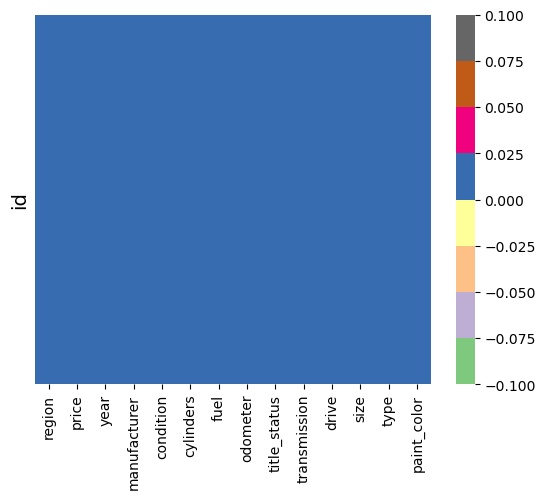

In [54]:
#Heat map to check that all cat and num categories been assigned values
sns.heatmap(train_set.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [56]:
# Initial filtering based on unrealistic maximum values observed in 'price' and 'odometer'
reasonable_max_price = 100000
reasonable_max_odometer = 150000  
reasonable_min_year = 2000

# Filter the dataframe
train_set = train_set[
    (train_set['price'] <= reasonable_max_price) &
    (train_set['odometer'] <= reasonable_max_odometer) &
    (train_set['year'] >= reasonable_min_year)
]

# Check the result
print(train_set[['price', 'year', 'odometer']].describe())

               price           year       odometer
count  265241.000000  265241.000000  265241.000000
mean    19354.680694    2014.060469   69715.761843
std     15217.374558       4.473349   43329.091194
min         0.000000    2000.000000       0.000000
25%      7595.000000    2012.000000   30909.000000
50%     16900.000000    2015.000000   68696.000000
75%     28990.000000    2018.000000  106071.000000
max    100000.000000    2022.000000  150000.000000


In [58]:
## remove outliers
#this function  will return the range of the variables and the values outside this range will be outliers
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

In [60]:
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)
train_set['logprice'] = np.log(train_set['price'])

C:\Users\mattm\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [62]:
#removing outliers 
out=np.array(['logprice','odometer','year'])
for col in out:
    o1,o2=outliers(train_set,col)
    df_new=train_set[(train_set[col]>=o1) & (train_set[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
train_set=train_set[train_set['price']!=0]
train_set.drop('logprice',axis=1,inplace=True)

IQR of logprice = 6.926054204701131 12.283897432244444
IQR of odometer = -81835.5 218816.5
IQR of year = 2003.0 2027.0


In [64]:
# convert categorical data to numeric
le = LabelEncoder()

for col in cat_cols:
    train_set[col] = le.fit_transform(train_set[col].astype(str))

train_set.head(25)

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
id,,,,,,,,,,,,,,
7313816341,347,17850,2012.0,20,1,5,3,75500.0,5,1,0,3,0,1
7314115423,260,52500,2020.0,14,0,7,3,17860.0,1,1,1,0,0,0
7314368139,258,34575,2019.0,26,0,3,3,15360.0,1,1,3,1,1,11
7314424203,8,29900,2018.0,17,0,5,3,45620.0,1,3,2,0,1,11
7306822958,246,8500,2013.0,39,3,3,3,97208.0,1,1,2,0,0,0
7315513611,53,33590,2014.0,39,3,7,5,55251.0,1,3,1,0,9,9
7316199338,269,14499,2001.0,13,0,0,3,124933.0,1,1,3,0,0,0
7311604604,260,45000,2018.0,13,0,7,3,52085.0,1,1,0,0,9,11
7316865468,0,19900,2016.0,39,1,5,3,62000.0,6,1,2,2,1,6


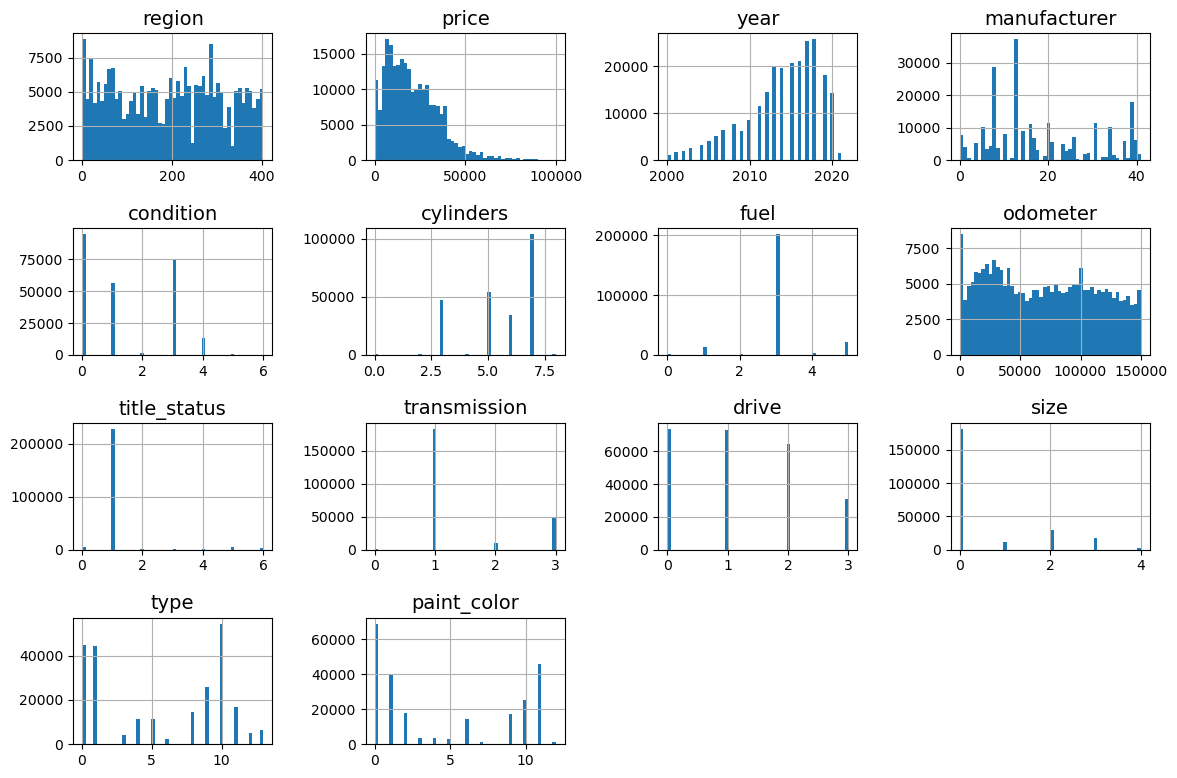

In [66]:
#rerun histogram for the training set
train_set.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots_train_set")
plt.show()

In [68]:
#scale numerical data

norm = StandardScaler()
train_set['price'] = np.log(train_set['price'])
train_set['odometer'] = norm.fit_transform(np.array(train_set['odometer']).reshape(-1,1))
train_set['year'] = norm.fit_transform(np.array(train_set['year']).reshape(-1,1))

#scaling target variable
q1,q3=(train_set['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
train_set=train_set[(train_set.price>=o1) & (train_set.price<=o2)]

train_set['region'] = norm.fit_transform(np.array(train_set['region']).reshape(-1,1))

In [70]:
len(train_set)

231239

In [72]:
# split training set into training and test datasets

X_train,X_test,y_train,y_test=train_test_split(train_set.iloc[:,list(range(len(list(train_set.columns))-1))],train_set.iloc[:,-1:].values.T[0],train_size=0.9,test_size=0.1,random_state=0)

X_train.tail()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
id,,,,,,,,,,,,,
7316791186,0.627700,8.846497,-0.654638,13,1,3,3,1.010658,1,1,3,3,10
7314946241,-0.205298,10.560748,0.890614,13,3,5,3,-0.963957,1,3,1,0,9
7313732826,0.299550,9.210040,0.449114,31,1,3,3,0.220601,1,1,2,0,10
7310478803,0.888538,10.534493,1.111364,24,3,7,3,-1.000478,1,3,2,0,1
7316841017,0.838054,9.902987,0.449114,13,3,7,3,-0.711040,1,1,2,0,12


In [74]:
len(X_train)

208115

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Looking for Correlations

In [78]:
corr_matrix = X_train.corr(numeric_only=True)

In [80]:
corr_matrix["price"].sort_values(ascending=False)

price           1.000000
year            0.655560
transmission    0.277803
cylinders       0.274641
type            0.099359
condition       0.069677
fuel           -0.012344
region         -0.025210
manufacturer   -0.045541
title_status   -0.117765
drive          -0.188801
size           -0.196946
odometer       -0.567997
Name: price, dtype: float64

# Model Implementation


####       1) Linear Regressor
####       2) Ridge Regressor
####       3) Lasso Regressor
####       4) K-Neighbors Regressor

## 1) Linear Regression

In [84]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [91]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

In [100]:
#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

In [107]:
#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])   

#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test,y_pred)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 1.04194913e-03  8.32233302e-01 -1.14399898e-01 -7.37475743e-04
  1.77828082e-01 -2.37084657e-01 -7.60637706e-02  1.82188836e-01
  1.05844248e-01  1.92630570e-01  3.33584751e-01  6.34108510e-01
  1.44686973e-01]
MSLE : 1.1099969496605275
Root MSLE : 1.0535639276572293
R2 Score : 0.08429819776041725 or 8.4298%


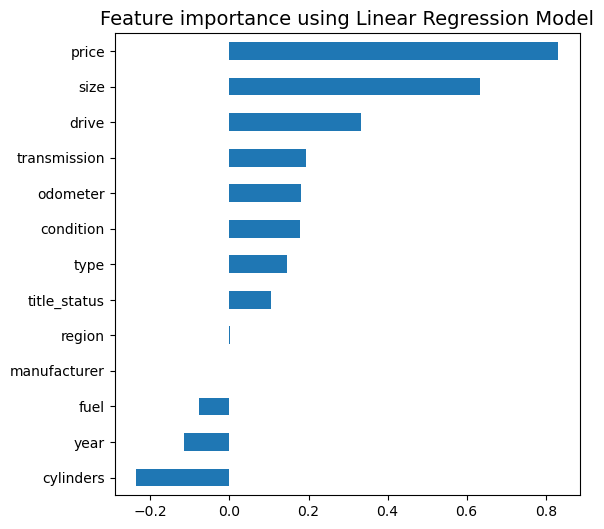

In [109]:
#plotting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig
plt.show()

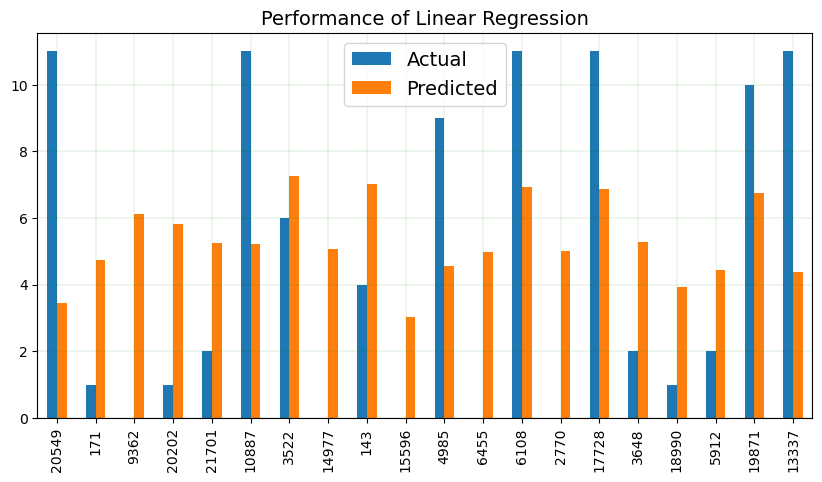

In [111]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig
plt.show()

## 3.2) Ridge regression

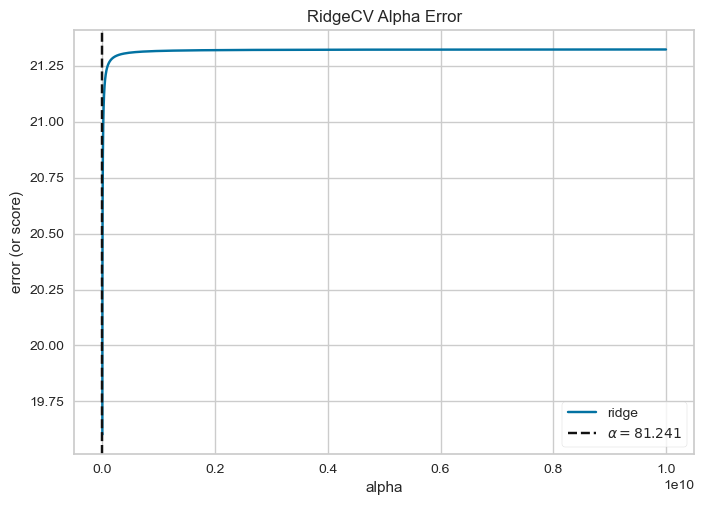

<Axes: title={'center': 'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [124]:
#predicting value of alpha

alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

In [130]:
#model object and fitting model
RR=Ridge(alpha=81.241,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [132]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 1.110032192978834
Root MSLE : 1.0535806532861325
R2 Score : 0.0842971281238516 or 8.4297%


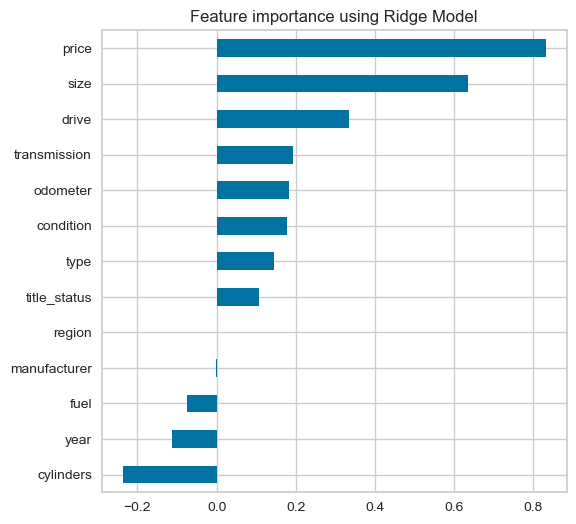

In [134]:
#Visualization of Feature Importance

coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig
plt.show()

## 3.3) Lasso Regression

In [141]:
#model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [143]:
#model evaluation
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 1.1100148516644464
Root MSLE : 1.0535724235497275
R2 Score : 0.08429845719888773 or 8.4298%


## 3.4) KNN

In [145]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.8889016039365061
K = 2  , Root MSLE = 0.8505978531833652
K = 3  , Root MSLE = 0.8434816681244711
K = 4  , Root MSLE = 0.8461420404971239
K = 5  , Root MSLE = 0.8526907853977732
K = 6  , Root MSLE = 0.8579885511737468
K = 7  , Root MSLE = 0.8647302055461294
K = 8  , Root MSLE = 0.8688289840489642
K = 9  , Root MSLE = 0.8726881439128552


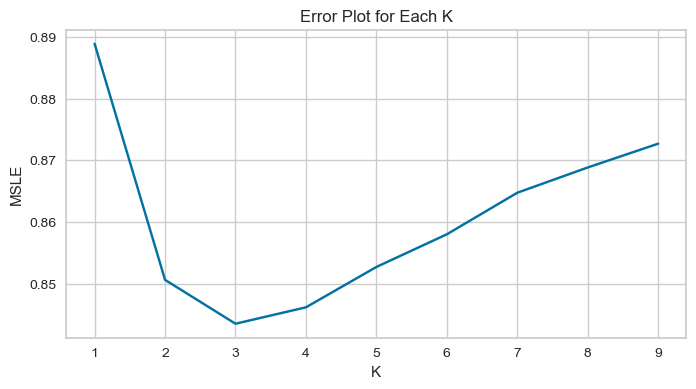

In [147]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig
plt.show()

In [149]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=4) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [151]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.7159563526966365
Root MSLE : 0.8461420404971239
R2 Score : 0.3083294627919363 or 30.8329%


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### The KNN model provides the best performance, yielding the highest R2 score (30.3% and lowest MSLE(.716).  

###The most important features are:
- Size
- Drive

## additional meaningful (but less so) factors include:

- Transmission
- Mileage
- Condition





### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

<p>After having completed the analysis of used car sales, these machine-learning models have predicted that the price of a vehicle can be determined with 31% accuracy.  The key factors in driving price to maximize revenue are Size and Drive

<p>
Additional work would need to be completed to improve the accuracy of this model and to identify additional driving factors</p>

